# Objetivo:
> Clasificación de una muestra de galaxias AGN en galaxias con núcleos activos de alta excitación (HERG) y de baja excitación (LERG). Esto es, crear un algoritmo que utilice muestras de galaxias ya clasificadas en HERGs y LERGs como muestras de entrenamiento y luego aplicarlo en la identificación de galaxias clasificadas como AGNs.
## Muestras:
> Se dispone de una muestra de galaxias clasificadas como galaxias AGN, una muestra de galaxias AGN clasificadas como galaxias de tipo HERG y otra muestra de galaxias AGN clasificadas como galaxias de tipo LERG. Las tres muestras pertenecen a la muestra principial del survey Sloan (SDSS).
## Features de las muestras
> Para cada galaxia se tiene 27 features: 
- Redshift espectroscópico 
- Error en redshift 
- Masa estelar
- Caraterística espectral Dn4000
- El flujo para cuatro líneas espectrales y sus correspondientes errores
- Magnitud absoluta en los cinco filtros del Sloan
- Colores
- La magnitud en los cuatro filtros del survey Wise y sus correspondientes errores

In [1]:
from astropy.table import Table
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set()

# Lectura de datos

In [2]:
AGNs = Table.read('AGNs_noClass.fits')
AGNs = AGNs.to_pandas()
AGNs.columns

Index(['Z', 'Z_ERR', 'SMASS_MEDIAN', 'D4000', 'O3F', 'N2F', 'HBF', 'HAF',
       'O3F_ERR', 'N2F_ERR', 'HBF_ERR', 'HAF_ERR', 'O3HB', 'N2HA', 'ABSU',
       'ABSG', 'ABSR', 'ABSI', 'ABSZ', 'w1mpro', 'w1sigmpro', 'w2mpro',
       'w2sigmpro', 'w3mpro', 'w3sigmpro', 'w4mpro', 'w4sigmpro'],
      dtype='object')

In [3]:
HERGs = Table.read('HERGs.fits')
HERGs = HERGs.to_pandas()
LERGs = Table.read('LERGs.fits')
LERGs = LERGs.to_pandas()

In [4]:
AGNs['g-r'] = AGNs['ABSG'] - AGNs['ABSR']
AGNs['u-r'] = AGNs['ABSU'] - AGNs['ABSU']
HERGs['g-r'] = HERGs['ABSG'] - HERGs['ABSR']
HERGs['u-r'] = HERGs['ABSU'] - HERGs['ABSR']
LERGs['g-r'] = LERGs['ABSG'] - LERGs['ABSR']
LERGs['u-r'] = LERGs['ABSU'] - LERGs['ABSR']

In [5]:
fulldata = pd.concat([HERGs.assign(dataset='HERG'), LERGs.assign(dataset='LERG'), AGNs.assign(dataset='AGN')])
fulldata = fulldata.reset_index()
fulldata = fulldata.fillna(-999)
print('HERGs = ', np.sum((fulldata['dataset'] == 'HERG')))
print('LERGs = ', np.sum((fulldata['dataset'] == 'LERG')))
print('AGN = ', np.sum((fulldata['dataset'] == 'AGN')))
# fulldata.describe()

HERGs =  173
LERGs =  1682
AGN =  1078


# Análisis exploratorio

En este análisis se limita la información de algunas columnas al rango determinado por los cuartiles 0.01 y 0.99, con la intención de que las representaciones gráficas reflejen sólo la parte más significativa de los datos. Esto sólo se realiza en esta etapa exploratoria, en el entrenamiento del algoritmo se pretende utilizar todos los datos.

In [7]:
d4000_q = np.quantile(fulldata['D4000'], q=[0.01,0.99])
fulldata = fulldata[fulldata['D4000'] > d4000_q[0]]
fulldata = fulldata[fulldata['D4000'] < d4000_q[1]]
print('HERGs = ', np.sum((fulldata['dataset'] == 'HERG')))
print('LERGs = ', np.sum((fulldata['dataset'] == 'LERG')))
print('AGN = ', np.sum((fulldata['dataset'] == 'AGN')))

HERGs =  172
LERGs =  1658
AGN =  1043


In [8]:
ABSR_q = np.quantile(fulldata['ABSR'], q=[0.01,0.99])
fulldata = fulldata[fulldata['ABSR'] > ABSR_q[0]]
fulldata = fulldata[fulldata['ABSR'] < ABSR_q[1]]
print('HERGs = ', np.sum((fulldata['dataset'] == 'HERG')))
print('LERGs = ', np.sum((fulldata['dataset'] == 'LERG')))
print('AGN = ', np.sum((fulldata['dataset'] == 'AGN')))

HERGs =  163
LERGs =  1630
AGN =  1022


In [9]:
for i in range(2):
    O3HB_q = np.quantile(fulldata['O3HB'], q=[0.01,0.99])
    fulldata = fulldata[fulldata['O3HB'] > O3HB_q[0]]
    fulldata = fulldata[fulldata['O3HB'] < O3HB_q[1]]
print('HERGs = ', np.sum((fulldata['dataset'] == 'HERG')))
print('LERGs = ', np.sum((fulldata['dataset'] == 'LERG')))
print('AGN = ', np.sum((fulldata['dataset'] == 'AGN')))

HERGs =  163
LERGs =  1623
AGN =  726


In [10]:
for i in range(2):
    N2HA_q = np.quantile(fulldata['N2HA'], q=[0.01,0.99])
    fulldata = fulldata[fulldata['N2HA'] > N2HA_q[0]]
    fulldata = fulldata[fulldata['N2HA'] < N2HA_q[1]]
print('HERGs = ', np.sum((fulldata['dataset'] == 'HERG')))
print('LERGs = ', np.sum((fulldata['dataset'] == 'LERG')))
print('AGN = ', np.sum((fulldata['dataset'] == 'AGN')))

HERGs =  163
LERGs =  1623
AGN =  478


In [17]:
SMASS_MEDIAN_q = np.quantile(fulldata['SMASS_MEDIAN'], q=[0.01,0.99])
fulldata = fulldata[fulldata['SMASS_MEDIAN'] > SMASS_MEDIAN_q[0]]
fulldata = fulldata[fulldata['SMASS_MEDIAN'] < SMASS_MEDIAN_q[1]]
print('HERGs = ', np.sum((fulldata['dataset'] == 'HERG')))
print('LERGs = ', np.sum((fulldata['dataset'] == 'LERG')))
print('AGN = ', np.sum((fulldata['dataset'] == 'AGN')))

HERGs =  162
LERGs =  1579
AGN =  465


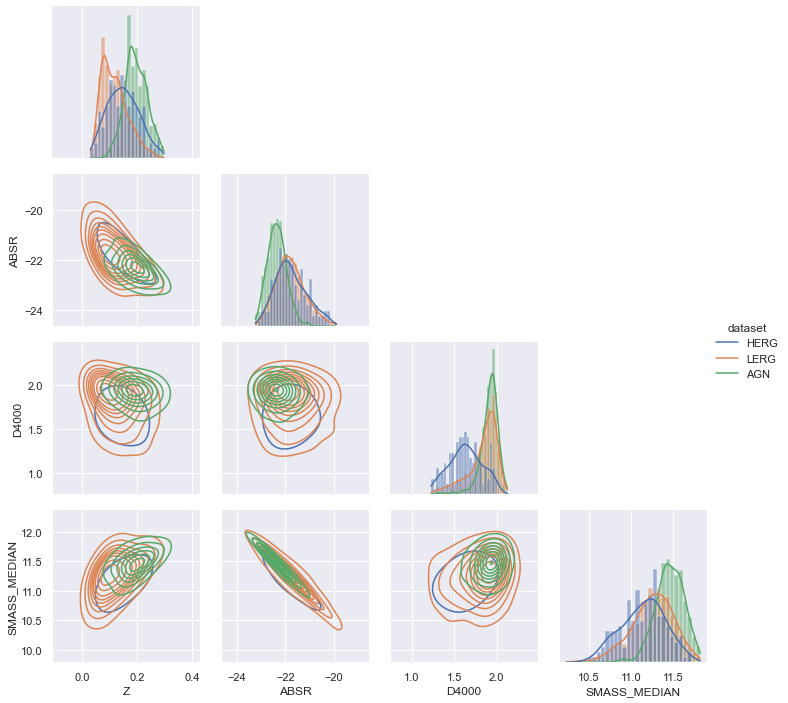

In [18]:
g = sns.PairGrid(fulldata, vars=['Z','ABSR','D4000','SMASS_MEDIAN'], hue='dataset', corner=True)
g.map_lower(sns.kdeplot, bw_adjust=2)
g.map_diag(sns.histplot, stat="probability", common_norm=False, kde=True)
g.add_legend()

## *Diagrama BPT*

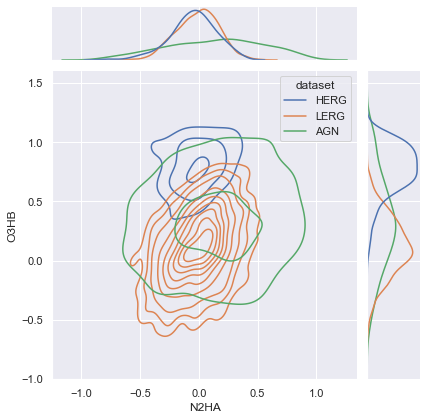

In [15]:
sns.jointplot(data=fulldata, x="N2HA", y="O3HB", kind="kde", hue='dataset', marginal_kws=dict(common_norm=False))

## *Diagrama de color*

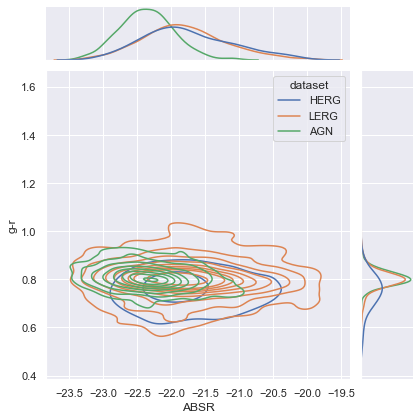

In [16]:
sns.jointplot(data=fulldata, x="ABSR", y='g-r', kind="kde", hue='dataset', marginal_kws=dict(common_norm=False))

## *Análisis PCA*

In [26]:
# Se normalizan los datos
ss = StandardScaler()
datanorm = ss.fit_transform(LERGs[['Z', 'SMASS_MEDIAN', 'D4000', 'O3F', 'N2F', 'HBF', 'HAF', 'O3HB', 'N2HA', 'ABSU',
       'ABSG', 'ABSR', 'ABSI', 'ABSZ']])

In [27]:
pca = PCA(n_components=14)
pca.fit(datanorm)
comp = pca.transform(datanorm)
mean = pca.mean_
components = pca.components_
var = pca.explained_variance_

<AxesSubplot:>

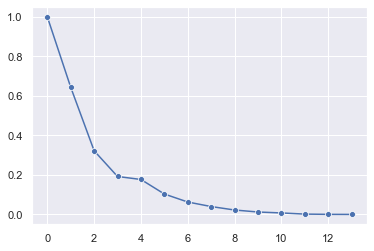

In [33]:
sns.lineplot(x=np.arange(14), y=var/var[0], marker='o')